In [82]:
# examine the spatial distribution of omf
# copied from obs_space_omf_meshplot_single_file.ipynb
# modi: 2024/07/19 -- to compare crtm2.3 and crtm2.4 for simulating satellite radiances

import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

plt.rcParams['figure.figsize'] = [20, 13]

0.21.1


In [83]:
root  = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/old_crtm_VarBC_experiment/compare_crtm_2.3_vs_2.4'
crtms = ['crtm2.3','crtm2.4']
sensor = 'amsua_n18'
#sensor = 'atms_n20'
if sensor.startswith('amsua'):
    channels=[1,2,3,4,5,6,7,8,9,10,11,12,13,15]
elif sensor.startswith('atms'):
    channels=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]

lat_use={}; lon_use={}; clw_obs_use={}; clw_model_use={}; omf_use={}; omf_unadj_use={};
bc_cnst_use={}; #obs_use={};

for cc in crtms:
    rr=nc.Dataset(f'{root}/{cc}/diag_{sensor}_ges.2022070100.nc4')

    channel    = rr.variables['Channel_Index'][:]
    lat        = rr.variables['Latitude'][:]
    lon        = rr.variables['Longitude'][:]
    inv_obserr = rr.variables['Inverse_Observation_Error'][:]
    #obserr     = rr.variables['Sym_Observation_Error'][:]
    clw_obs    = rr.variables['clw_obs'][:]
    clw_model  = rr.variables['clw_guess_retrieval'][:]
    obs        = rr.variables['Observation'][:]
    omf        = rr.variables['Obs_Minus_Forecast_adjusted'][:]
    omf_unadj  = rr.variables['Obs_Minus_Forecast_unadjusted'][:]
    #wspd       = rr.variables['Sfc_Wind_Speed'][:]
    #fland      = rr.variables['Land_Fraction'][:]
    fwater     = rr.variables['Water_Fraction'][:]
    #symcloud   = 0.5*(clw_obs + clw_model)
    qc         = rr.variables['QC_Flag'][:]
    bc_cnst    = rr.variables['BC_Constant'][:]
    
    lat_use[cc]={}; lon_use[cc]={}; omf_use[cc]={}; omf_unadj_use[cc]={}; clw_model_use[cc]={}; clw_obs_use[cc]={}; bc_cnst_use[cc]={};
    
    for ch in channels:
        chn         = ch
        sea_screen  = (fwater>= 0.99)
        use         = np.where( (qc == 0)&(channel==chn)&sea_screen )

        lat_use[cc][ch]        = lat[use]
        lon_use[cc][ch]        = lon[use]
        #obs_use[cc][ch]        = obs[use]
        omf_use[cc][ch]        = omf[use]
        omf_unadj_use[cc][ch]  = omf_unadj[use]
        clw_model_use[cc][ch]  = clw_model[use]
        clw_obs_use[cc][ch]    = clw_obs[use]
        bc_cnst_use[cc][ch]    = bc_cnst[use]


In [ ]:
plt.figure(figsize=(12,9))
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
#plt.scatter(lon_use, lat_use, c=clw_obs_use, s=200, marker='s', cmap='gray', alpha=1.0, vmin=0, vmax=0.45)
plt.scatter(lon_use[cc][ch_select], lat_use[cc][ch_select], c=omf_unadj_use[cc][ch_select], s=10, cmap='RdBu_r', alpha=0.7, vmin=-12, vmax=12)

plt.colorbar(shrink=0.5)  # Add colorbar to show the scale
plt.title(f" H(x) from {cc} w/o varBC   {sensor} {channel}",fontsize=18)

plt.show()

<Figure size 1200x900 with 0 Axes>

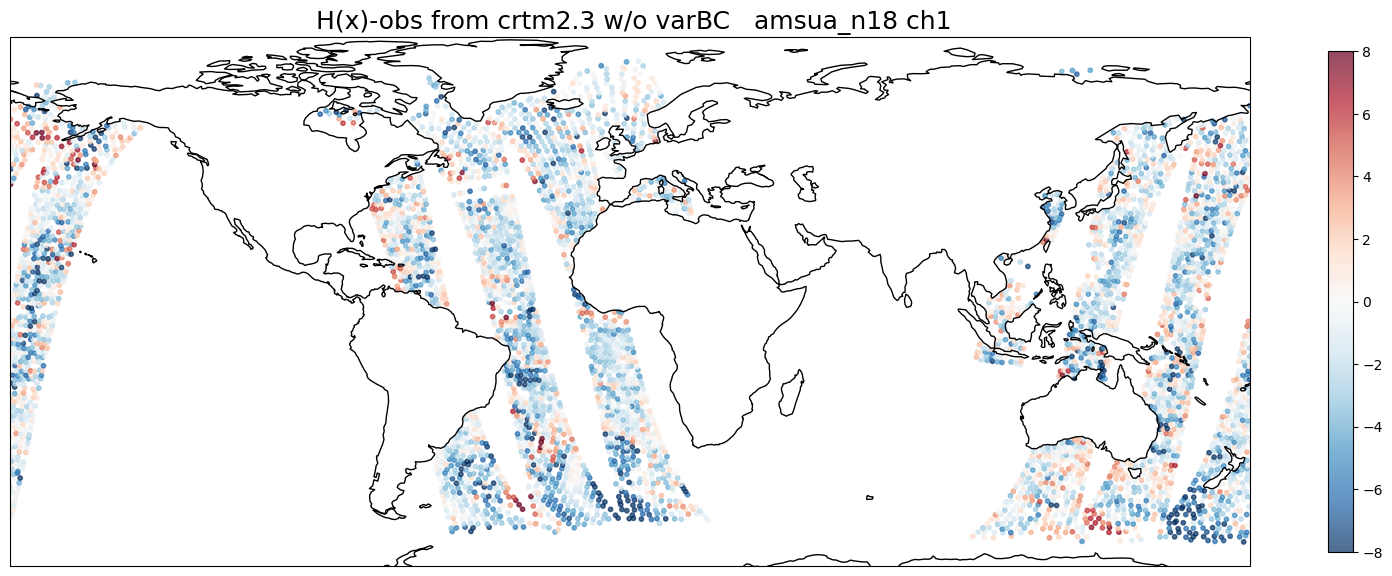

<Figure size 1200x900 with 0 Axes>

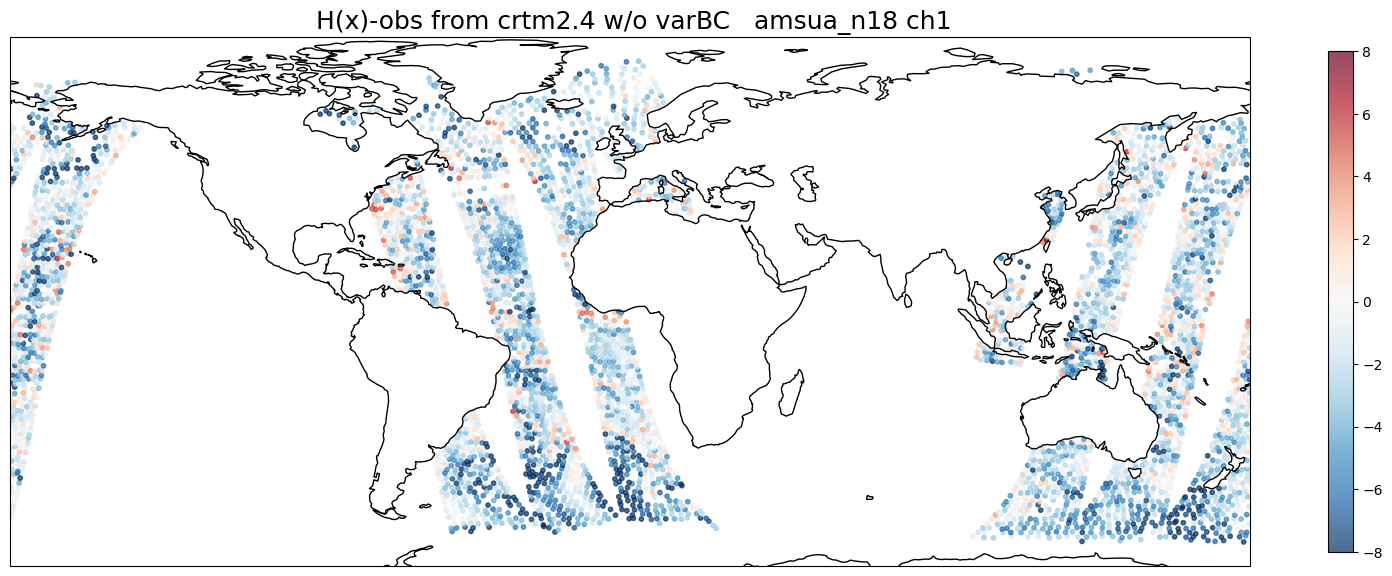

In [84]:
ch_select = 1
v_min = -8
v_max =  8
for cc in crtms:
    plt.figure(figsize=(12,9))
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax.coastlines()
    #plt.scatter(lon_use[cc], lat_use[cc], c=obs_use[cc]-omf_unadj_use[cc], s=10, cmap='RdBu_r', alpha=0.7, vmin=150, vmax=250)
    plt.scatter(lon_use[cc][ch_select], lat_use[cc][ch_select], c=-omf_unadj_use[cc][ch_select], s=10, cmap='RdBu_r', alpha=0.7, vmin=v_min, vmax=v_max)

    plt.colorbar(shrink=0.5)  # Add colorbar to show the scale
    plt.title(f" H(x)-obs from {cc} w/o varBC   {sensor} ch{ch_select}",fontsize=18)

    plt.show()

In [ ]:
bc_cnst_use

In [ ]:
for cc in crtms:
    plt.figure(figsize=(12,9))
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax.coastlines()
    #plt.scatter(lon_use, lat_use, c=clw_obs_use, s=200, marker='s', cmap='gray', alpha=1.0, vmin=0, vmax=0.45)
    plt.scatter(lon_use[cc], lat_use[cc], c=omf_use[cc]-omf_unadj_use[cc], s=10, cmap='RdBu_r', alpha=0.7, vmin=-2, vmax=2)

    plt.colorbar(shrink=0.5)  # Add colorbar to show the scale
    plt.title(f" {cc} varBC increment  {sensor} {channel}",fontsize=18)

    plt.show()

In [ ]:
variable_names = rr.variables.keys()
print(variable_names)

In [ ]:

#for i in range(160):
for i in range(1):
    init_time    = datetime(2022, 6, 20, 0, 0, 0)  # Year, month, day, hour, minute, second
    current_time = init_time + i*timedelta(hours=6)
    
    # Format the new datetime
    time = current_time.strftime("%Y%m%d%H")
    print(time)
    
    #satellite = 'n19'
    #satellite = 'n18'
    #satellite = 'n15'
    #satellite = 'metop-b'
    satellite = 'metop-c'

    rr=nc.Dataset(f"/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/radstats/amsua/s2022_C192_v2p5_edmf1ens0/diag_amsua_{satellite}_ges.{time}.nc4")

    ch         = rr.variables['Channel_Index'][:]
    lat        = rr.variables['Latitude'][:]
    lon        = rr.variables['Longitude'][:]
    #inv_obserr = rr.variables['Inverse_Observation_Error'][:]
    #obserr     = rr.variables['Sym_Observation_Error'][:]
    clw_obs    = rr.variables['clw_obs'][:]
    clw_model  = rr.variables['clw_guess_retrieval'][:]
    omf        = rr.variables['Obs_Minus_Forecast_adjusted'][:]
    #wspd       = rr.variables['Sfc_Wind_Speed'][:]
    #fland      = rr.variables['Land_Fraction'][:]
    fwater     = rr.variables['Water_Fraction'][:]
    #symcloud   = 0.5*(clw_obs + clw_model)
    qc         = rr.variables['QC_Flag'][:]

    chn         = 1
    channel     = 'ch1'
    sea_screen  = (fwater>= 0.99)
    use         = np.where( (qc == 0)&(ch==chn)&sea_screen )

    lat_use        = lat[use]
    lon_use        = lon[use]
    #obserr_use     = obserr[use]
    #inv_obserr_use = inv_obserr[use]
    #cloud_use      = symcloud[use]
    omf_use        = omf[use]
    clw_model_use  = clw_model[use]
    clw_obs_use    = clw_obs[use]
    clw_diff_use   = clw_obs_use - clw_model_use
    #wspd_use       = wspd[use]

    plt.figure(figsize=(22,18))
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax.coastlines()
    plt.scatter(lon_use, lat_use, c=clw_obs_use, s=200, marker='s', cmap='gray', alpha=1.0, vmin=0, vmax=0.45)
    plt.scatter(lon_use, lat_use, c=omf_use, s=4, cmap=custom_cmap, alpha=0.7, vmin=-12, vmax=12)
    
    plt.pcolor
    plt.colorbar(shrink=0.5)  # Add colorbar to show the scale
    plt.title(f"{satellite}   {time}   AMSUA-{channel}")
    
    plt.show()
    
    

In [ ]:
from datetime import datetime, timedelta

# Specify the date and time
specified_datetime = datetime(2022, 6, 20, 0, 0, 0)  # Year, month, day, hour, minute, second

# Add 6 hours to the specified datetime
new_datetime = specified_datetime + 2*timedelta(hours=6)

# Format the new datetime
formatted_new_datetime = new_datetime.strftime("%Y%m%d%H")

print("Original specified datetime:", specified_datetime)
print("New datetime after adding 6 hours:", formatted_new_datetime)